In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns



In [47]:
df= pd.read_csv('/kaggle/input/final-internship/final_internship_data.csv')
df.head()

,User ID,User Name,Driver Name,Car Condition,Weather,Traffic Condition,key,fare_amount,pickup_datetime,pickup_longitude,...,month,weekday,year,jfk_dist,ewr_dist,lga_dist,sol_dist,nyc_dist,distance,bearing
0,KHVrEVlD,Kimberly Adams,Amy Butler,Very Good,windy,Congested Traffic,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21,-1.288826,...,6,0,2009,20.265840,55.176046,14.342611,34.543548,27.572573,1.030764,-2.918897
1,lPxIuEri,Justin Tapia,Hannah Zimmerman,Excellent,cloudy,Flow Traffic,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16,-1.291824,...,1,1,2010,44.667679,31.832358,23.130775,15.125872,8.755732,8.450134,-0.375217
2,gsVN8JLS,Elizabeth Lopez,Amanda Jackson,Bad,stormy,Congested Traffic,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00,-1.291242,...,8,3,2011,43.597686,33.712082,19.865289,17.722624,9.847344,1.389525,2.599961
3,9I7kWFgd,Steven Wilson,Amy Horn,Very Good,stormy,Flow Traffic,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42,-1.291319,...,4,5,2012,42.642965,32.556289,21.063132,15.738963,7.703421,2.799270,0.133905
4,8QN5ZaGN,Alexander Andrews,Cassandra Larson,Bad,stormy,Congested Traffic,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00,-1.290987,...,3,1,2010,43.329953,39.406828,15.219339,23.732406,15.600745,1.999157,-0.502703


In [48]:
df.columns

Index(['User ID', 'User Name', 'Driver Name', 'Car Condition', 'Weather',
       'Traffic Condition', 'key', 'fare_amount', 'pickup_datetime',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'passenger_count', 'hour', 'day', 'month',
       'weekday', 'year', 'jfk_dist', 'ewr_dist', 'lga_dist', 'sol_dist',
       'nyc_dist', 'distance', 'bearing'],
      dtype='object')

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 26 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   User ID            500000 non-null  object 
 1   User Name          500000 non-null  object 
 2   Driver Name        500000 non-null  object 
 3   Car Condition      500000 non-null  object 
 4   Weather            500000 non-null  object 
 5   Traffic Condition  500000 non-null  object 
 6   key                500000 non-null  object 
 7   fare_amount        500000 non-null  float64
 8   pickup_datetime    500000 non-null  object 
 9   pickup_longitude   500000 non-null  float64
 10  pickup_latitude    500000 non-null  float64
 11  dropoff_longitude  499995 non-null  float64
 12  dropoff_latitude   499995 non-null  float64
 13  passenger_count    500000 non-null  int64  
 14  hour               500000 non-null  int64  
 15  day                500000 non-null  int64  
 16  mo

In [50]:
df.isna().sum()

User ID              0
User Name            0
Driver Name          0
Car Condition        0
Weather              0
Traffic Condition    0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    5
dropoff_latitude     5
passenger_count      0
hour                 0
day                  0
month                0
weekday              0
year                 0
jfk_dist             5
ewr_dist             5
lga_dist             5
sol_dist             5
nyc_dist             5
distance             5
bearing              5
dtype: int64

In [51]:
df.dropna(inplace=True)

In [52]:
df.duplicated().sum()


0

In [53]:
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'], errors='coerce')



In [54]:
df_cat=df.select_dtypes(include='object')
df_cat.drop(['User ID', 'User Name', 'Driver Name','key'],axis=1,inplace=True)
df_cat.head()

,Car Condition,Weather,Traffic Condition
0,Very Good,windy,Congested Traffic
1,Excellent,cloudy,Flow Traffic
2,Bad,stormy,Congested Traffic
3,Very Good,stormy,Flow Traffic
4,Bad,stormy,Congested Traffic


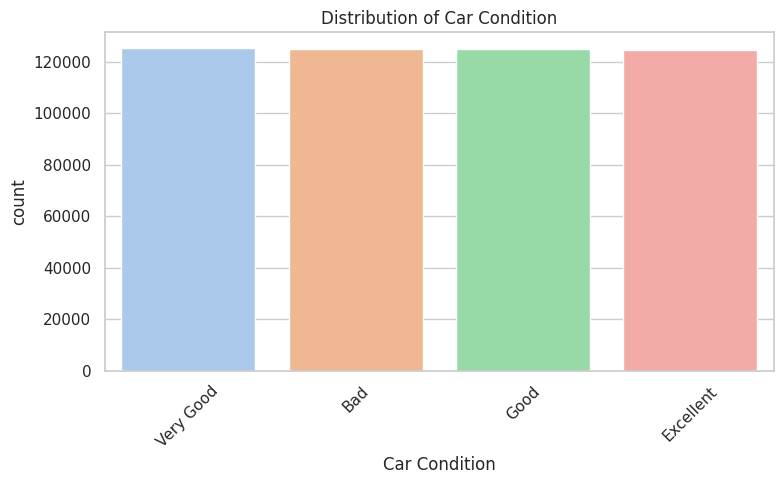

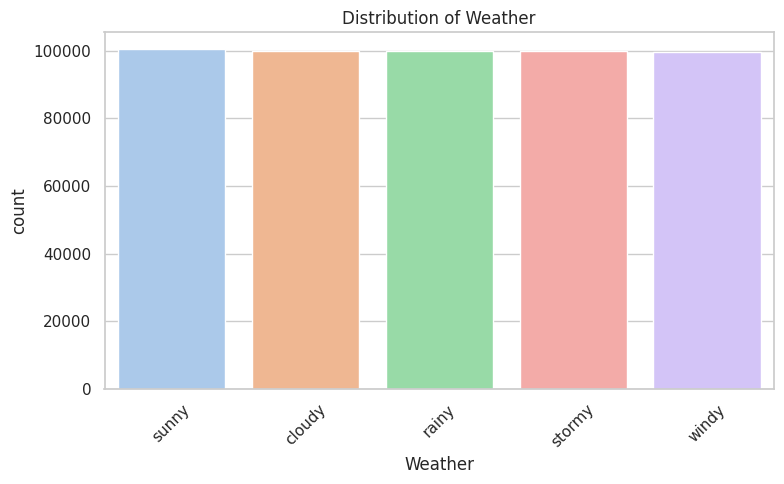

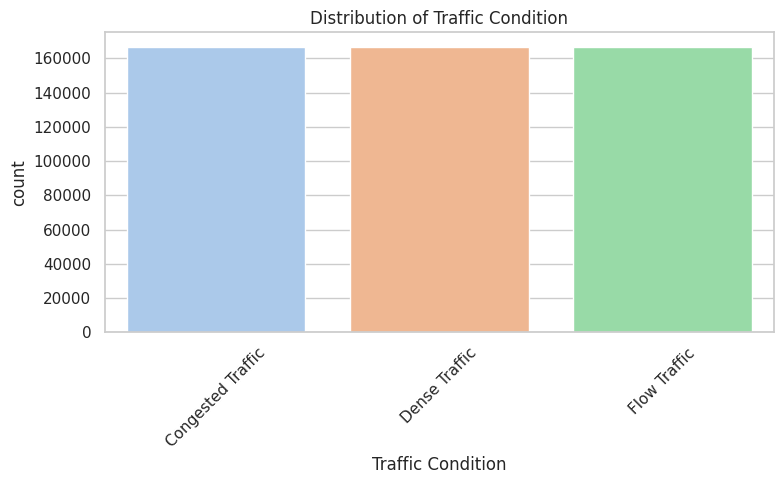

In [55]:
for col in df_cat.columns:
    value_counts = df_cat[col].value_counts().reset_index()
    value_counts.columns = [col, 'count']
    
    plt.figure(figsize=(8, 5))
    sns.barplot(data=value_counts, x=col, y='count', palette='pastel')
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [56]:
for i in df_cat.columns:
  print(i)
  print(df_cat[i].unique())

Car Condition
['Very Good' 'Excellent' 'Bad' 'Good']
Weather
['windy' 'cloudy' 'stormy' 'sunny' 'rainy']
Traffic Condition
['Congested Traffic' 'Flow Traffic' 'Dense Traffic']


In [57]:
df.columns

Index(['User ID', 'User Name', 'Driver Name', 'Car Condition', 'Weather',
       'Traffic Condition', 'key', 'fare_amount', 'pickup_datetime',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'passenger_count', 'hour', 'day', 'month',
       'weekday', 'year', 'jfk_dist', 'ewr_dist', 'lga_dist', 'sol_dist',
       'nyc_dist', 'distance', 'bearing'],
      dtype='object')

In [58]:
df = df.sort_values(by='pickup_datetime')

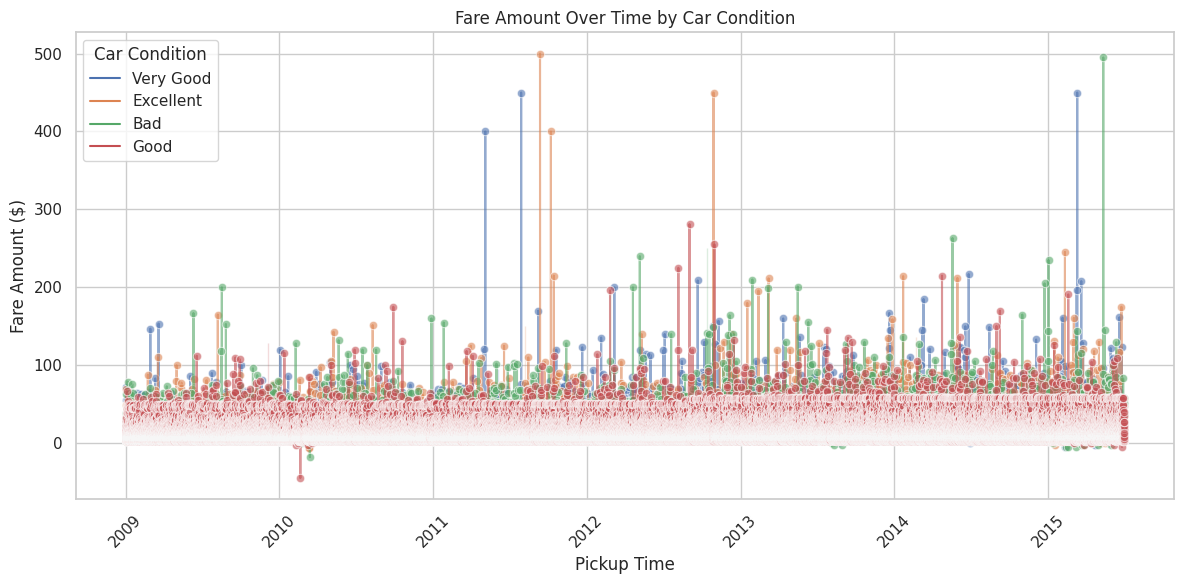

In [62]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.dropna(subset=['distance', 'fare_amount'], inplace=True)
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, 
             x='pickup_datetime', 
             y='fare_amount', 
             hue='Car Condition',
             alpha=0.6, 
             marker='o', 
             markersize=6)

plt.title('Fare Amount Over Time by Car Condition')
plt.xlabel('Pickup Time')
plt.ylabel('Fare Amount ($)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



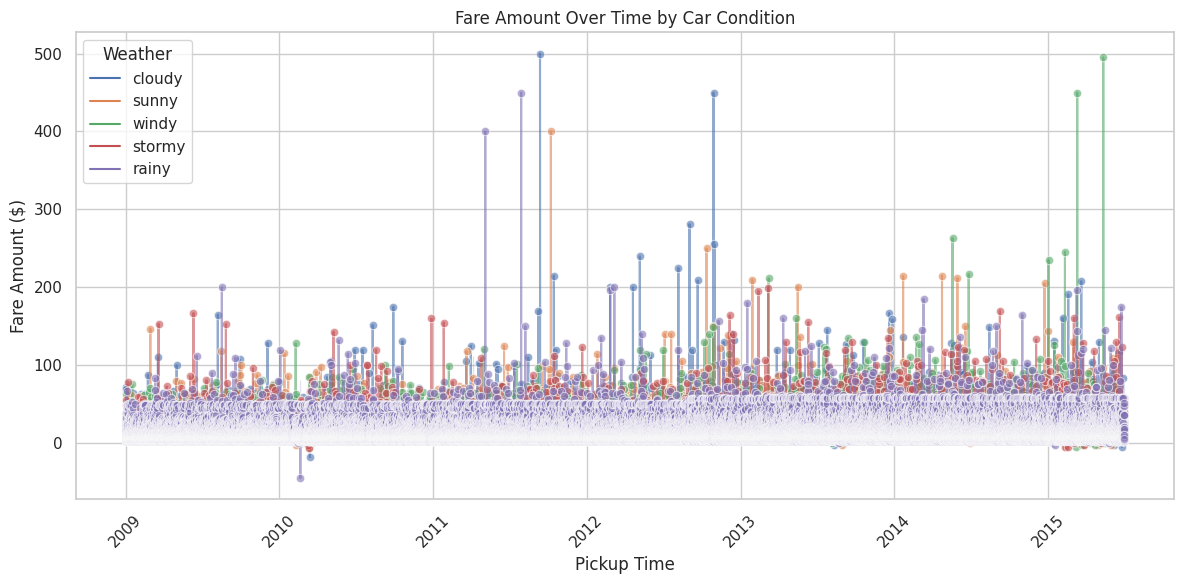

In [63]:

plt.figure(figsize=(12, 6))
sns.lineplot(data=df,
             x='pickup_datetime',
             y='fare_amount',
             hue='Weather',
             alpha=0.6,
             marker='o',
             markersize=6)

plt.title('Fare Amount Over Time by Car Condition')  # same title as Plotly
plt.xlabel('Pickup Time')
plt.ylabel('Fare Amount ($)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



KeyboardInterrupt: 

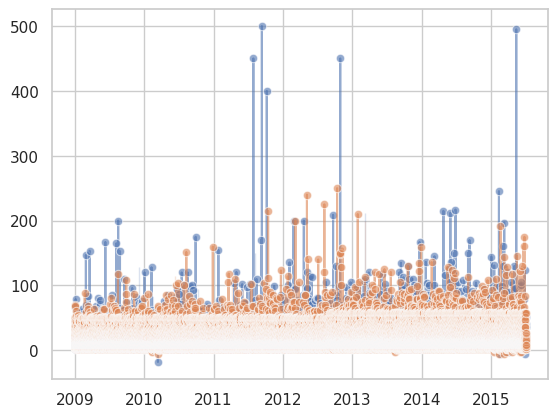

In [64]:
sns.lineplot(data=df,
             x='pickup_datetime',
             y='fare_amount',
             hue='Traffic Condition',
             alpha=0.6,
             marker='o',
             markersize=6)

plt.title('Fare Amount Over Time by Car Condition')  # same title as Plotly
plt.xlabel('Pickup Time')
plt.ylabel('Fare Amount ($)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
arr=['windy','cloudy','stormy','sunny','rainy']
for i in arr:
        df_tmp = df[df['Weather'] == i]
    
        plt.figure(figsize=(12, 6))
        sns.lineplot(data=df_tmp,
                     x='pickup_datetime',
                     y='fare_amount',
                     alpha=0.6,
                     marker='o',
                     markersize=6)
    
        plt.title(f'Fare Amount Over Time by Weather: {i}')
        plt.xlabel('Pickup Time')
        plt.ylabel('Fare Amount ($)')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

In [ ]:
arr=['Very Good','Excellent','Bad','Good']
for i in arr:
  df_tmp = df[df['Car Condition'] == i]

    plt.figure(figsize=(12, 6))
    sns.lineplot(data=df_tmp,
                 x='pickup_datetime',
                 y='fare_amount',
                 alpha=0.6,
                 marker='o',
                 markersize=6)

    plt.title(f'Fare Amount Over Time by Car Condition: {i}')
    plt.xlabel('Pickup Time')
    plt.ylabel('Fare Amount ($)')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [ ]:
arr=['Congested Traffic','Flow Traffic','Dense Traffic']
for i in arr:
    df_tmp = df[df['Traffic Condition'] == i]

    plt.figure(figsize=(12, 6))
    sns.lineplot(data=df_tmp,
                 x='pickup_datetime',
                 y='fare_amount',
                 alpha=0.6,
                 marker='o',
                 markersize=6)

    plt.title(f'Fare Amount Over Time by Traffic Condition: {i}')
    plt.xlabel('Pickup Time')
    plt.ylabel('Fare Amount ($)')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df,
                x='distance',
                y='fare_amount',
                alpha=0.6)

plt.title('Fare Amount vs Trip Distance')
plt.xlabel('Trip Distance (km)')
plt.ylabel('Fare (USD)')
plt.tight_layout()
plt.show()

In [65]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for col in df_cat.columns:
    df[col] = le.fit_transform(df[col]).astype(int)

df.head()


,User ID,User Name,Driver Name,Car Condition,Weather,Traffic Condition,key,fare_amount,pickup_datetime,pickup_longitude,...,month,weekday,year,jfk_dist,ewr_dist,lga_dist,sol_dist,nyc_dist,distance,bearing
297860,1dC3kxxc,Curtis Gomez,Kristi Marshall,3,0,1,2009-01-01 00:31:32.0000001,11.8,2009-01-01 00:31:32,-1.290760,...,1,3,2009,40.999665,37.485363,16.082425,20.517104,12.157719,2.792337,2.561974
124750,IpnMPYL3,Bailey Nunez,Donna Jensen,1,3,1,2009-01-01 00:35:03.0000001,16.5,2009-01-01 00:35:03,-1.291403,...,1,3,2009,40.606297,29.700030,26.128255,10.559046,6.396394,6.202529,2.983769
82469,yXYYaOxr,Karen Rubio,Nicole Allen,0,4,2,2009-01-01 00:41:00.0000003,6.2,2009-01-01 00:41:00,-1.291442,...,1,3,2009,43.329742,32.776998,20.632802,16.503120,8.627405,0.707946,-1.638496
124445,R8bteMmr,Michelle Brooks,Christopher Salazar,3,3,2,2009-01-01 00:47:26.0000007,5.4,2009-01-01 00:47:26,-1.291322,...,1,3,2009,41.537802,33.679695,19.693870,16.491499,8.262839,1.273781,-2.298479
76195,r848pzBy,Mary Lewis,Chelsea Hunt,1,4,2,2009-01-01 01:21:54.0000002,4.9,2009-01-01 01:21:54,-1.290703,...,1,3,2009,34.095147,35.948522,20.295202,15.613687,8.366669,1.068263,2.185749


In [66]:
df.drop(["User ID","User Name","Driver Name","key"],axis=1,inplace=True)

In [67]:
df.drop(["pickup_datetime"],axis=1,inplace=True)

In [68]:
df.head()

,Car Condition,Weather,Traffic Condition,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,...,month,weekday,year,jfk_dist,ewr_dist,lga_dist,sol_dist,nyc_dist,distance,bearing
297860,3,0,1,11.8,-1.290760,0.711553,-1.291076,0.711186,1,0,...,1,3,2009,40.999665,37.485363,16.082425,20.517104,12.157719,2.792337,2.561974
124750,1,3,1,16.5,-1.291403,0.711019,-1.291605,0.710058,1,0,...,1,3,2009,40.606297,29.700030,26.128255,10.559046,6.396394,6.202529,2.983769
82469,0,4,2,6.2,-1.291442,0.711239,-1.291296,0.711232,2,0,...,1,3,2009,43.329742,32.776998,20.632802,16.503120,8.627405,0.707946,-1.638496
124445,3,3,2,5.4,-1.291322,0.711214,-1.291125,0.711081,1,0,...,1,3,2009,41.537802,33.679695,19.693870,16.491499,8.262839,1.273781,-2.298479
76195,1,4,2,4.9,-1.290703,0.710609,-1.290883,0.710512,4,1,...,1,3,2009,34.095147,35.948522,20.295202,15.613687,8.366669,1.068263,2.185749


In [69]:
df.columns

Index(['Car Condition', 'Weather', 'Traffic Condition', 'fare_amount',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'passenger_count', 'hour', 'day', 'month',
       'weekday', 'year', 'jfk_dist', 'ewr_dist', 'lga_dist', 'sol_dist',
       'nyc_dist', 'distance', 'bearing'],
      dtype='object')

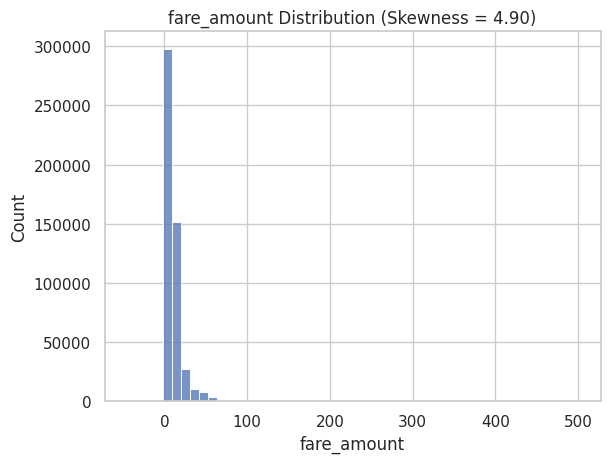

In [70]:
#fare_amount Distribution
import seaborn as sns
fig1 = sns.histplot(
    df,
    x="fare_amount",
    bins=50,
)
fig1.set_title("fare_amount Distribution (Skewness = {:.2f})".format(df["fare_amount"].skew()))
plt.show()

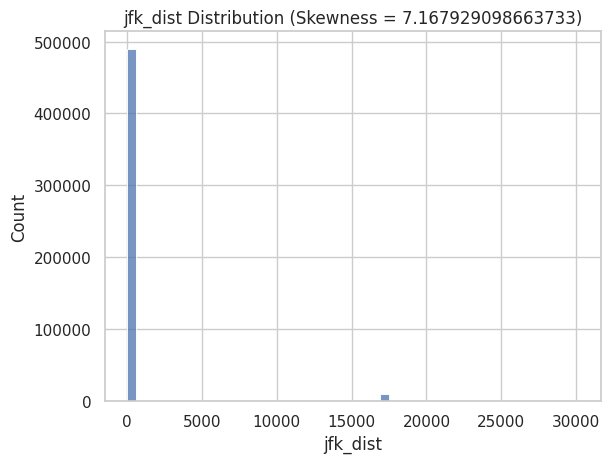

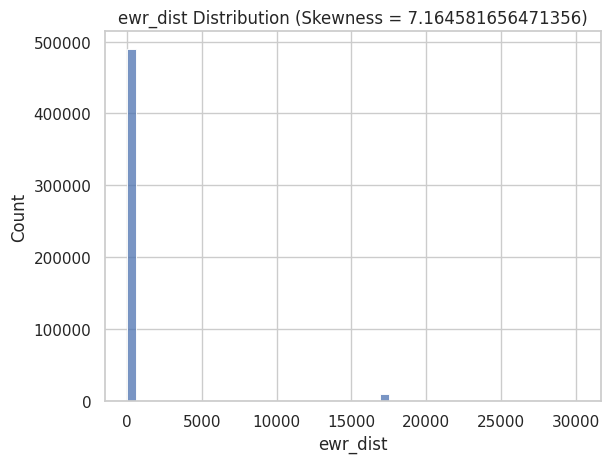

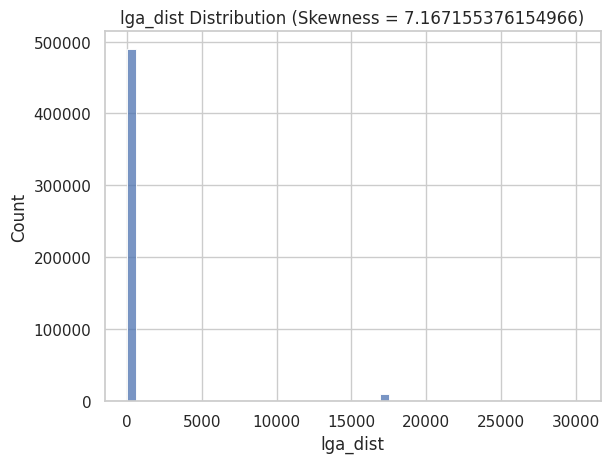

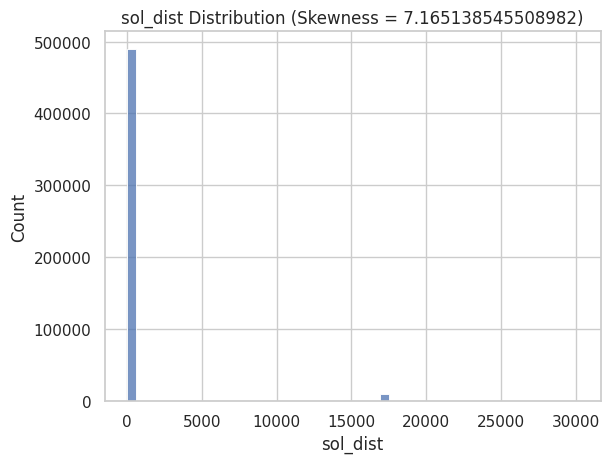

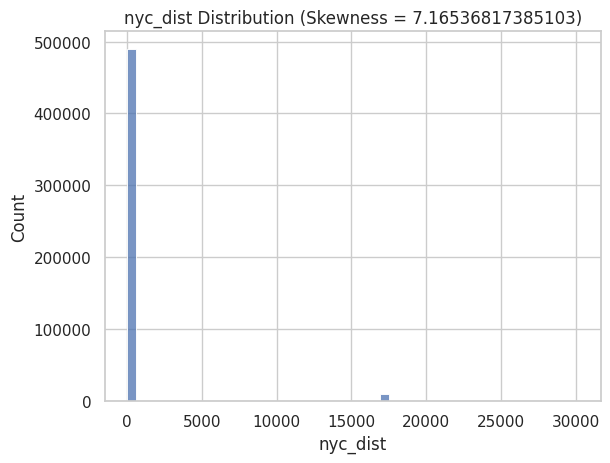

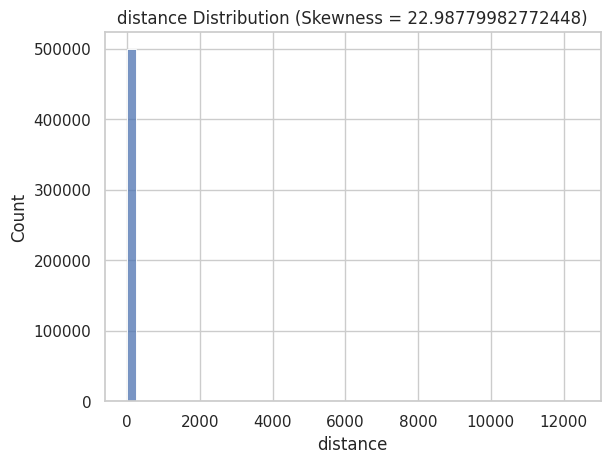

In [71]:
arr=['jfk_dist', 'ewr_dist', 'lga_dist', 'sol_dist',
       'nyc_dist', 'distance']
for i in arr :
  fig1 = sns.histplot(
    df,
    x=i,
    bins=50,
)
  fig1.set_title(f"{i} Distribution (Skewness = {df[i].skew()})")
  plt.show()

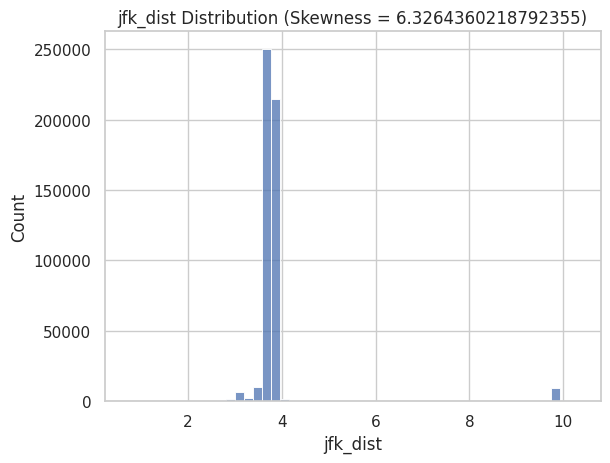

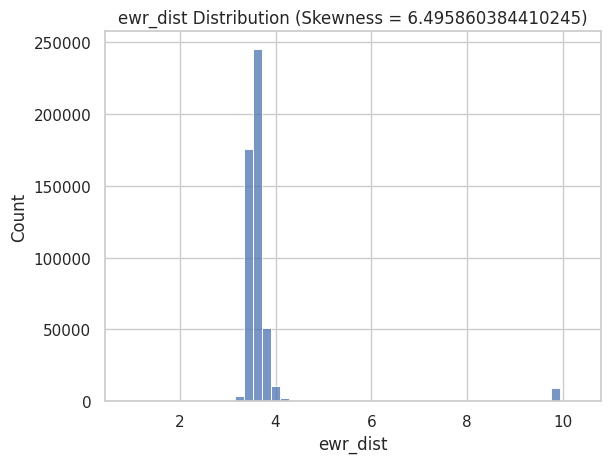

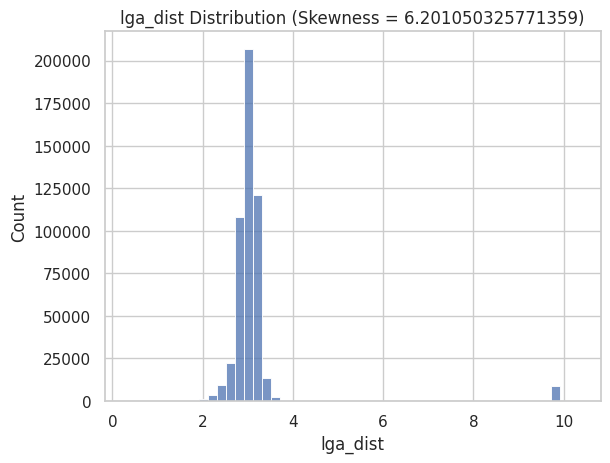

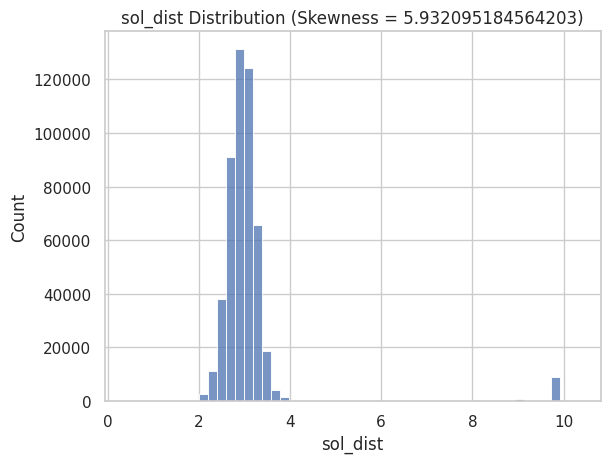

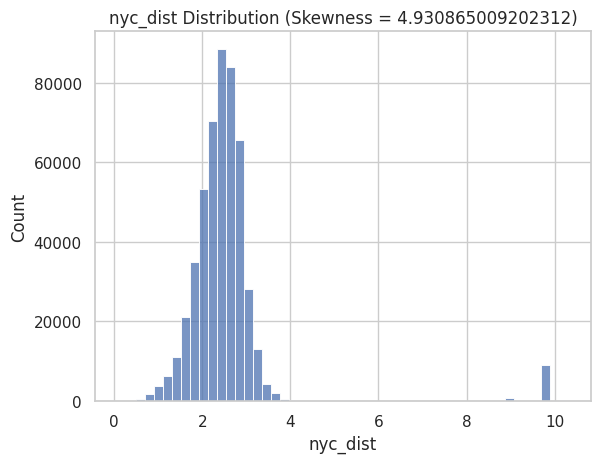

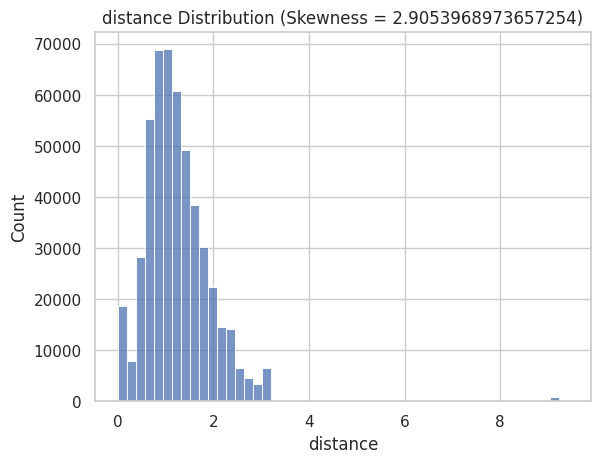

/usr/local/lib/python3.11/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning:

invalid value encountered in log1p



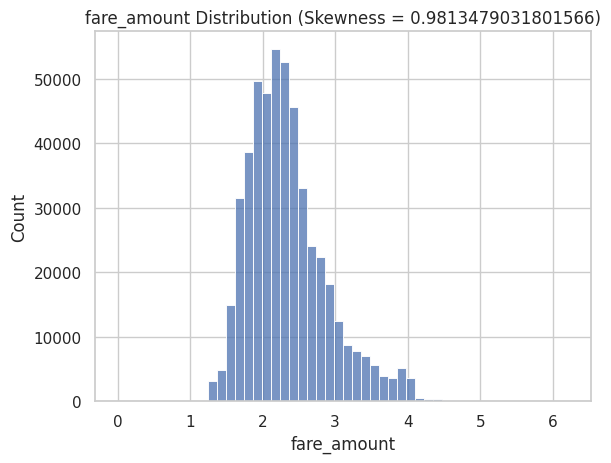

In [72]:
arr=['jfk_dist', 'ewr_dist', 'lga_dist', 'sol_dist',
       'nyc_dist', 'distance','fare_amount']
for i in arr :
  df[i]=np.log1p(df[i])
  fig1 = sns.histplot(
    df,
    x=i,
    bins=50,
)
  fig1.set_title(f"{i} Distribution (Skewness = {df[i].skew()})")
  plt.show()

In [73]:
from scipy.stats import zscore
arr=['jfk_dist', 'ewr_dist', 'lga_dist', 'sol_dist',
       'nyc_dist', 'distance','fare_amount']
for i in arr :
  df["z_score_"+i]= zscore(df[i])

  outlier_mask=abs(df["z_score_"+i])>3
  outliers=df[outlier_mask]
  print(i)
  print(str(len(outliers)/len(df["z_score_"+i])*100)+"%")


jfk_dist
2.1450214502145024%
ewr_dist
2.064220642206422%
lga_dist
2.061620616206162%
sol_dist
2.061420614206142%
nyc_dist
2.062220622206222%
distance
0.25980259802598027%
fare_amount
0.0%


/usr/local/lib/python3.11/dist-packages/scipy/stats/_stats_py.py:2893: RuntimeWarning:

invalid value encountered in less_equal

/usr/local/lib/python3.11/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning:

invalid value encountered in greater



In [74]:
df.head()

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning:

invalid value encountered in greater

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning:

invalid value encountered in less

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning:

invalid value encountered in greater

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning:

invalid value encountered in greater

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning:

invalid value encountered in less

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning:

invalid value encountered in greater



,Car Condition,Weather,Traffic Condition,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,...,nyc_dist,distance,bearing,z_score_jfk_dist,z_score_ewr_dist,z_score_lga_dist,z_score_sol_dist,z_score_nyc_dist,z_score_distance,z_score_fare_amount
297860,3,0,1,2.549445,-1.290760,0.711553,-1.291076,0.711186,1,0,...,2.577009,1.332983,2.561974,-0.155110,-0.077133,-0.307292,-0.020984,0.035056,0.127318,NaN
124750,1,3,1,2.862201,-1.291403,0.711019,-1.291605,0.710058,1,0,...,2.000993,1.974432,2.983769,-0.166030,-0.333981,0.165524,-0.642018,-0.466942,1.020805,NaN
82469,0,4,2,1.974081,-1.291442,0.711239,-1.291296,0.711232,2,0,...,2.264614,0.535292,-1.638496,-0.092451,-0.225434,-0.065877,-0.227338,-0.237196,-0.983801,NaN
124445,3,3,2,1.856298,-1.291322,0.711214,-1.291125,0.711081,1,0,...,2.226011,0.821444,-2.298479,-0.140335,-0.195462,-0.111238,-0.228002,-0.270839,-0.585214,NaN
76195,1,4,2,1.774952,-1.290703,0.710609,-1.290883,0.710512,4,1,...,2.237157,0.726709,2.185749,-0.363529,-0.123445,-0.081956,-0.279461,-0.261124,-0.717172,NaN


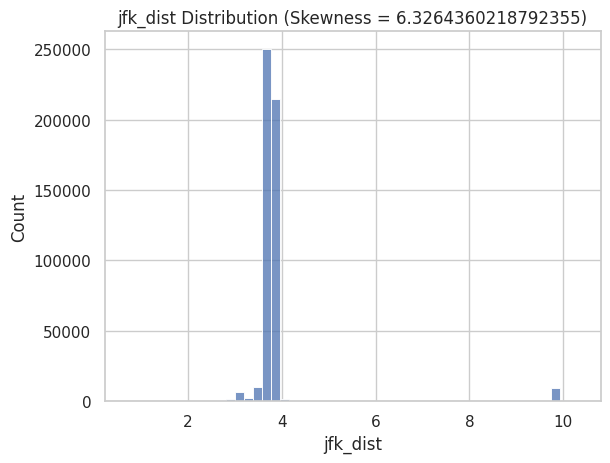

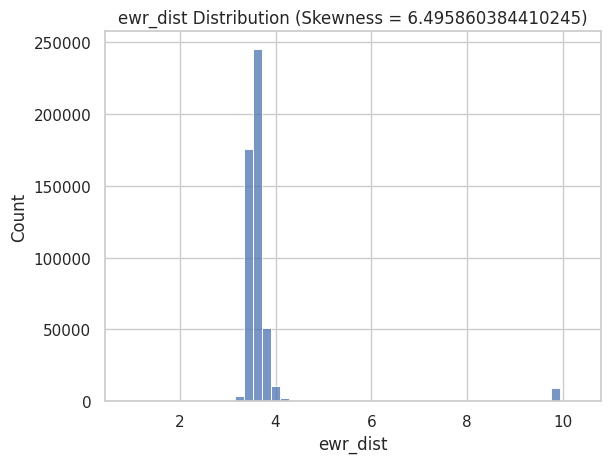

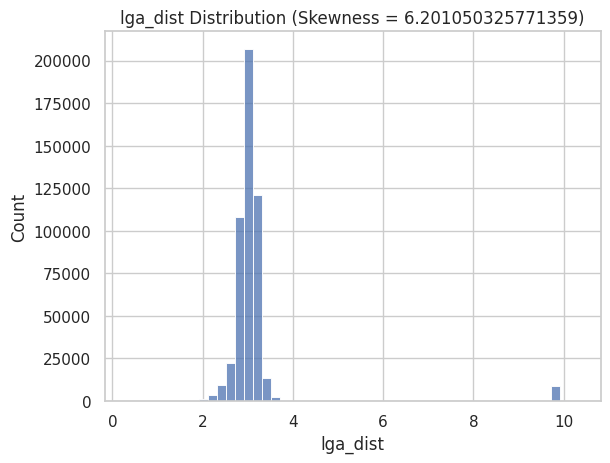

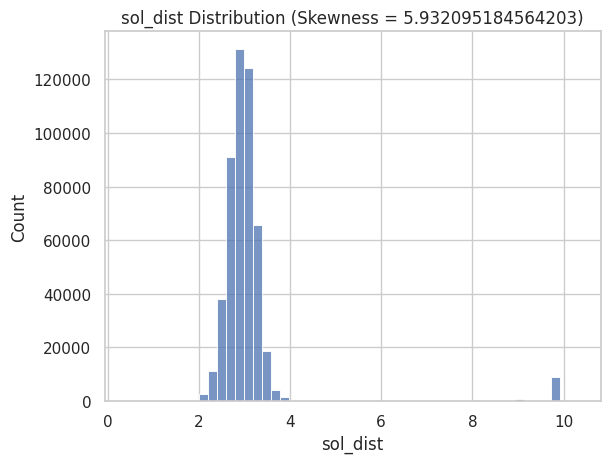

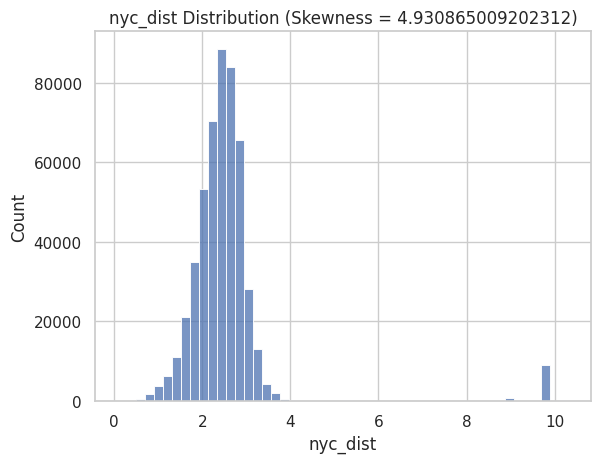

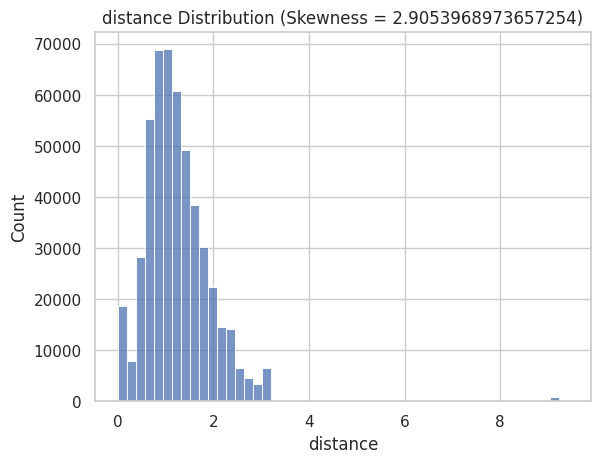

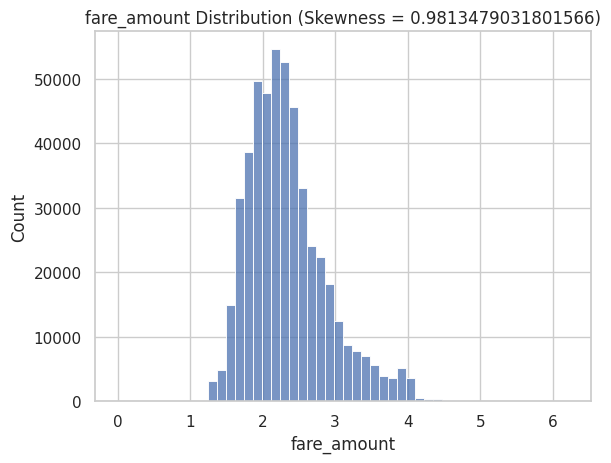

In [75]:
arr=['jfk_dist', 'ewr_dist', 'lga_dist', 'sol_dist',
       'nyc_dist', 'distance','fare_amount']
for i in arr :
  fig1 = sns.histplot(
    df,
    x=i,
    bins=50,
)
  fig1.set_title(f"{i} Distribution (Skewness = {df[i].skew()})")
  plt.show()

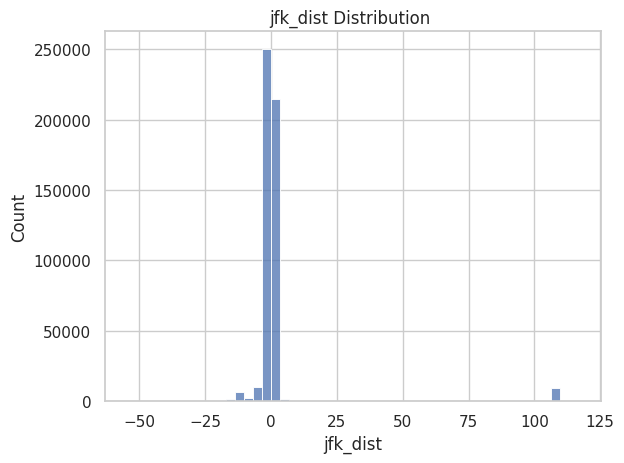

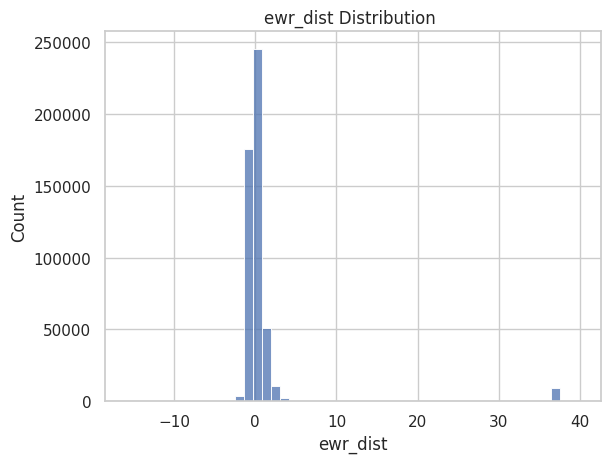

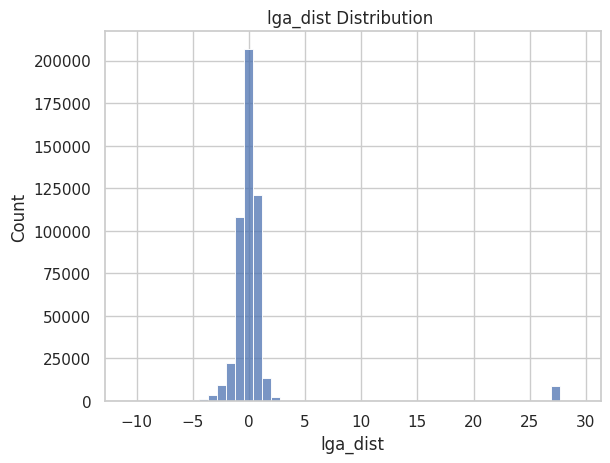

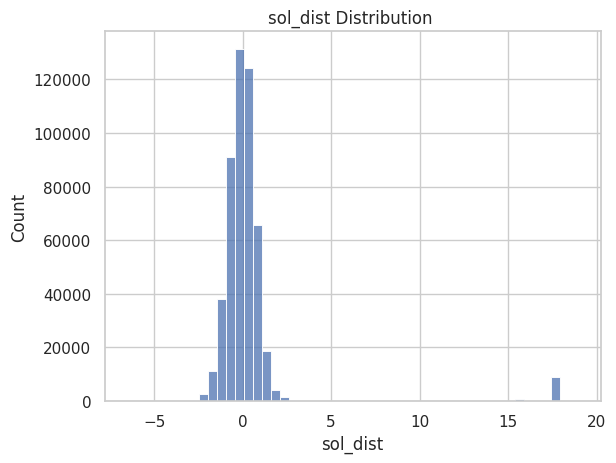

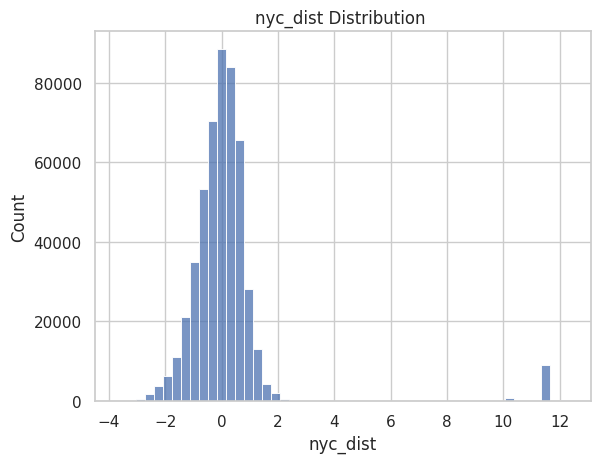

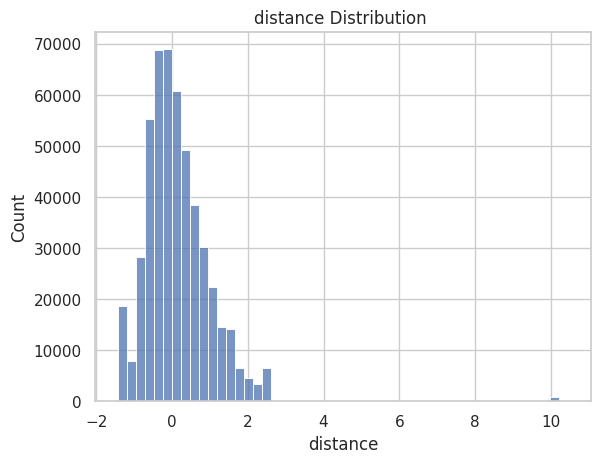

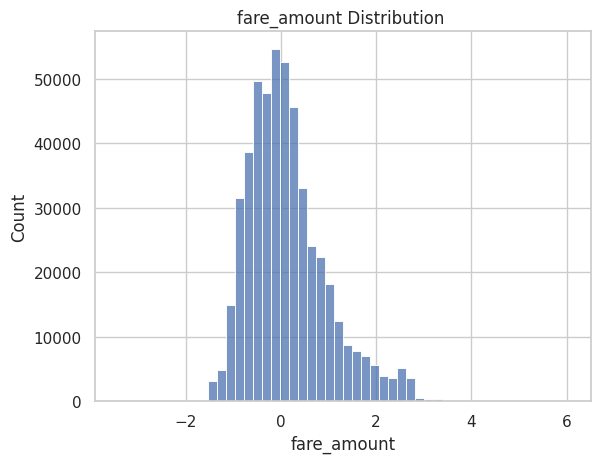

In [76]:
from sklearn.preprocessing import RobustScaler
arr=['jfk_dist', 'ewr_dist', 'lga_dist', 'sol_dist',
       'nyc_dist', 'distance','fare_amount']


scaler = RobustScaler()
df[arr]=scaler.fit_transform(df[arr])
for i in arr :
    fig1 = sns.histplot(
    df,
    x=i,
    bins=50,
)
    fig1.set_title(f"{i} Distribution ")
    plt.show()


In [77]:
df.columns

Index(['Car Condition', 'Weather', 'Traffic Condition', 'fare_amount',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'passenger_count', 'hour', 'day', 'month',
       'weekday', 'year', 'jfk_dist', 'ewr_dist', 'lga_dist', 'sol_dist',
       'nyc_dist', 'distance', 'bearing', 'z_score_jfk_dist',
       'z_score_ewr_dist', 'z_score_lga_dist', 'z_score_sol_dist',
       'z_score_nyc_dist', 'z_score_distance', 'z_score_fare_amount'],
      dtype='object')

In [107]:
df.drop(['z_score_jfk_dist',
       'z_score_ewr_dist', 'z_score_lga_dist', 'z_score_sol_dist',
       'z_score_nyc_dist', 'z_score_distance', 'z_score_fare_amount'],axis=1,inplace=True)

In [108]:
df.dropna(inplace=True)

In [109]:
from sklearn.model_selection import train_test_split

# X = features, y = target
X = df.drop("fare_amount", axis=1)
y = df["fare_amount"]

X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42
)



In [ ]:
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.metrics import mean_absolute_error, r2_score

# model = RandomForestRegressor(n_estimators=100, random_state=42)
# model.fit(X_train, y_train)

# # Predict on validation
# y_pred = model.predict(X_val)

# # Evaluate
# print("MAE:", mean_absolute_error(y_val, y_pred))
# print("R²:", r2_score(y_val, y_pred))


In [110]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, r2_score

model = XGBRegressor(
    n_estimators=400,
    learning_rate=0.1,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    n_jobs=-1
)

model.fit(X_train, y_train,
          eval_set=[(X_val, y_val)],
          early_stopping_rounds=10,
          verbose=False)


# Predict
y_pred = model.predict(X_val)

# Evaluate
print("MAE:", mean_absolute_error(y_val, y_pred))
print("R²:", r2_score(y_val, y_pred))


/usr/local/lib/python3.11/dist-packages/xgboost/sklearn.py:889: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



MAE: 0.2016879968545204
R²: 0.8294953274043465


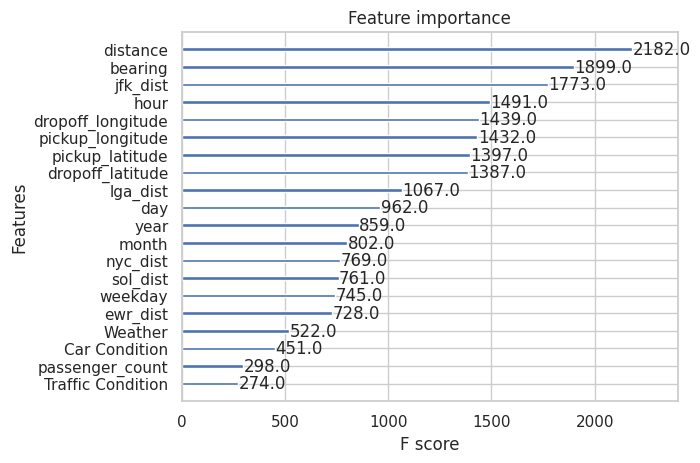

In [111]:
import matplotlib.pyplot as plt
import xgboost as xgb

xgb.plot_importance(model)
plt.show()


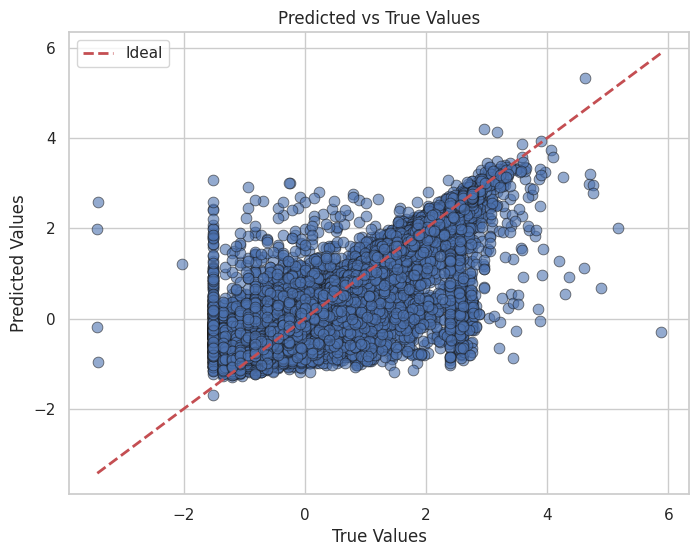

In [83]:
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure y_val and y_pred are 1D arrays
sns.set(style="whitegrid")

plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_val, y=y_pred, alpha=0.6, edgecolor='k', s=60)
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'r--', lw=2, label="Ideal")
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.title("Predicted vs True Values")
plt.legend()
plt.show()


In [112]:
X_train.shape

(399979, 20)

In [113]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Initialize and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on validation set
y_pred = model.predict(X_val)

# Evaluate the model
mae = mean_absolute_error(y_val, y_pred)
rmse = np.sqrt(mean_squared_error(y_val, y_pred))
r2 = r2_score(y_val, y_pred)

print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.2f}")

MAE: 0.34
RMSE: 0.67
R² Score: 0.35


In [85]:
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import make_scorer, mean_absolute_error, r2_score
import numpy as np

# Define parameter grid for tuning
param_grid = {
    'n_estimators': [200, 400],
    'learning_rate': [0.05, 0.1],
    'max_depth': [4, 6],
    'subsample': [0.8],
    'colsample_bytree': [0.8]
}

# Base model
xgb_model = XGBRegressor(
    random_state=42,
    n_jobs=-1
)

# GridSearchCV
grid = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid,
    scoring='r2',
    cv=5,
    verbose=1
)

# Fit model
grid.fit(X_train, y_train)

# Best model after tuning
model = grid.best_estimator_

print("✅ Best parameters:", grid.best_params_)
print("✅ Best R² from CV:", grid.best_score_)


Fitting 5 folds for each of 8 candidates, totalling 40 fits
✅ Best parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 400, 'subsample': 0.8}
✅ Best R² from CV: 0.8308821263034737


In [106]:
# R² score using 5-fold CV
scores = cross_val_score(model, X, y, cv=5, scoring='r2')
print(f"Cross-validated R² scores: {scores}")
print(f"Mean R²: {scores.mean():.4f}")

Cross-validated R² scores: [0.81394782 0.77345046 0.79319251 0.80512713 0.84710673]
Mean R²: 0.8066


In [87]:
# Predict on validation set
y_pred = model.predict(X_val)
mae = mean_absolute_error(y_val, y_pred)
rmse = np.sqrt(mean_squared_error(y_val, y_pred))
r2 = r2_score(y_val, y_pred)

print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.2f}")

MAE: 0.20
RMSE: 0.34
R² Score: 0.83


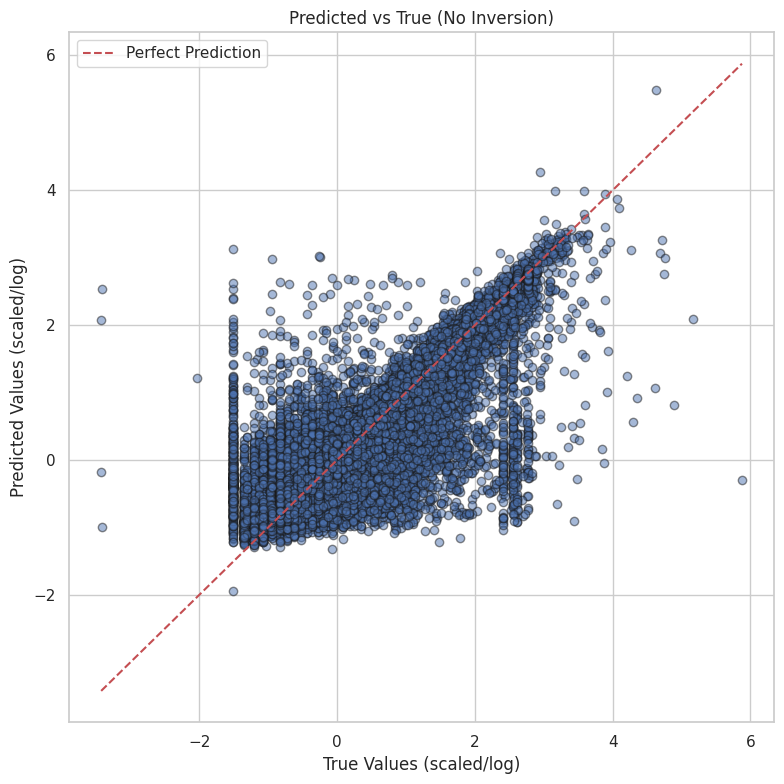

In [89]:
plt.figure(figsize=(8, 8))
plt.scatter(y_val, y_pred, alpha=0.5, edgecolor='k')
plt.plot([min(y_val), max(y_val)], [min(y_val), max(y_val)], 'r--', label='Perfect Prediction')
plt.xlabel('True Values (scaled/log)')
plt.ylabel('Predicted Values (scaled/log)')
plt.title('Predicted vs True (No Inversion)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [136]:
import numpy as np
from scipy.stats import zscore

arr = ['jfk_dist', 'ewr_dist', 'lga_dist', 'sol_dist', 'nyc_dist', 'distance', 'fare_amount']
df_2 = df.copy()  # Work on a copy to preserve original data

# --- STEP 1: Detect and clip outliers ---
for col in arr:
    Q1 = df_2[col].quantile(0.25)
    Q3 = df_2[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5*IQR
    upper_bound = Q3 + 1.5*IQR
    df_2[col] = np.clip(df_2[col], lower_bound, upper_bound)

# --- STEP 2: Verify clipping worked by recalculating Z-scores on df_2 ---
print("\nAfter clipping:")
for col in arr:
    z_scores = zscore(df_2[col])  # Now using CLIPPED data (df_2)
    outlier_mask = abs(z_scores) > 3
    outlier_percentage = (outlier_mask.sum() / len(df_2)) * 100
    print(f"{col}: {outlier_percentage:.2f}% outliers remaining")

# Show the first few rows of the clipped DataFrame
df_2.head()


After clipping:
jfk_dist: 0.00% outliers remaining
ewr_dist: 0.00% outliers remaining
lga_dist: 0.00% outliers remaining
sol_dist: 0.00% outliers remaining
nyc_dist: 0.00% outliers remaining
distance: 0.00% outliers remaining
fare_amount: 0.00% outliers remaining


,Car Condition,Weather,Traffic Condition,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,...,month,weekday,year,jfk_dist,ewr_dist,lga_dist,sol_dist,nyc_dist,distance,bearing
297860,3,0,1,0.453963,-1.290760,0.711553,-1.291076,0.711186,1,0,...,1,3,2009,-0.634922,0.428580,-0.750817,0.273922,0.216163,0.247578,2.561974
124750,1,3,1,0.930159,-1.291403,0.711019,-1.291605,0.710058,1,0,...,1,3,2009,-0.802601,-0.904199,1.107935,-1.327587,-0.684104,1.057329,2.983769
82469,0,4,2,-0.422076,-1.291442,0.711239,-1.291296,0.711232,2,0,...,1,3,2009,0.327203,-0.340950,0.198242,-0.258219,-0.272085,-0.759407,-1.638496
124445,3,3,2,-0.601410,-1.291322,0.711214,-1.291125,0.711081,1,0,...,1,3,2009,-0.408058,-0.185424,0.019919,-0.259931,-0.332419,-0.398175,-2.298479
76195,1,4,2,-0.725265,-1.290703,0.710609,-1.290883,0.710512,4,1,...,1,3,2009,-1.990417,0.188268,0.135032,-0.392634,-0.314997,-0.517766,2.185749


(499974, 21)

In [128]:
df_2.columns

Index(['Car Condition', 'Weather', 'Traffic Condition', 'fare_amount',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'passenger_count', 'hour', 'day', 'month',
       'weekday', 'year', 'jfk_dist', 'ewr_dist', 'lga_dist', 'sol_dist',
       'nyc_dist', 'distance', 'bearing'],
      dtype='object')

In [129]:
df_2.drop(['z_score_jfk_dist',
       'z_score_ewr_dist', 'z_score_lga_dist', 'z_score_sol_dist',
       'z_score_nyc_dist', 'z_score_distance', 'z_score_fare_amount'],axis=1,inplace=True)

KeyError: "['z_score_jfk_dist', 'z_score_ewr_dist', 'z_score_lga_dist', 'z_score_sol_dist', 'z_score_nyc_dist', 'z_score_distance', 'z_score_fare_amount'] not found in axis"

In [130]:
df_2.dropna(inplace=True)

/tmp/ipykernel_36/600093465.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



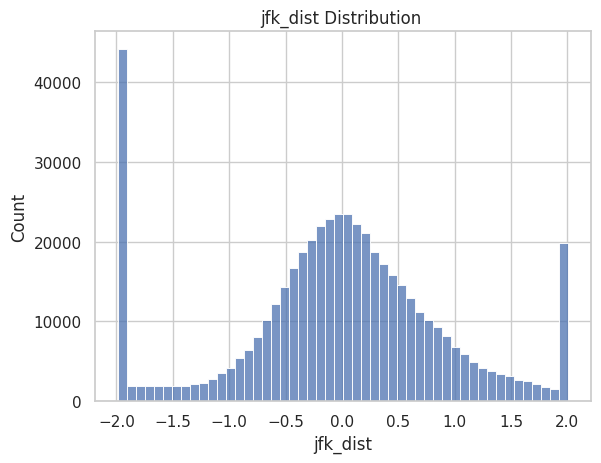

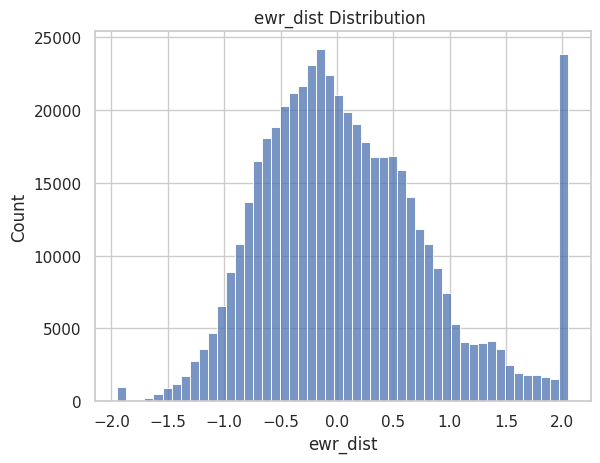

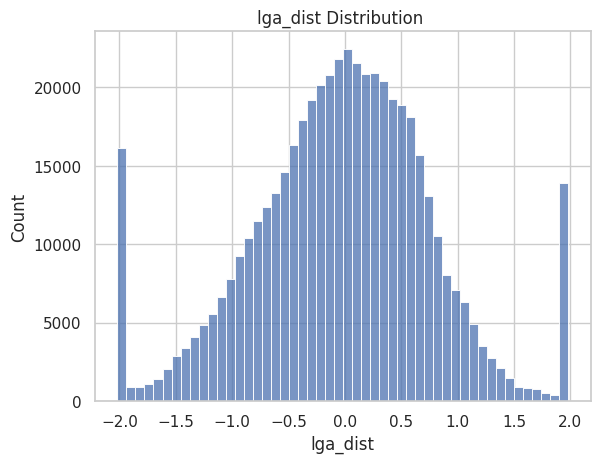

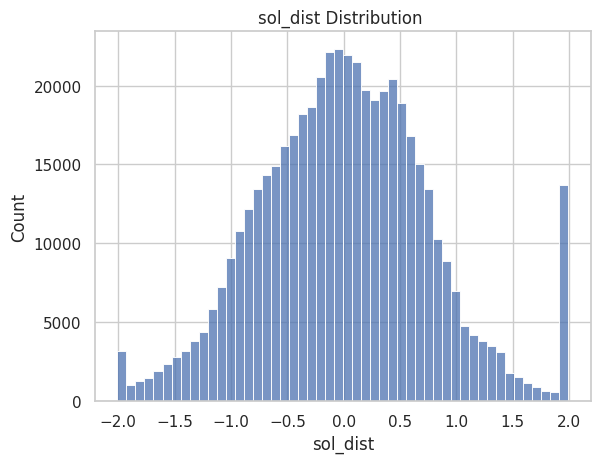

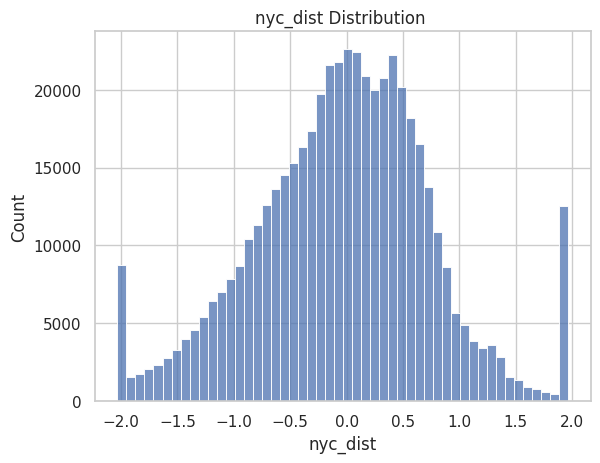

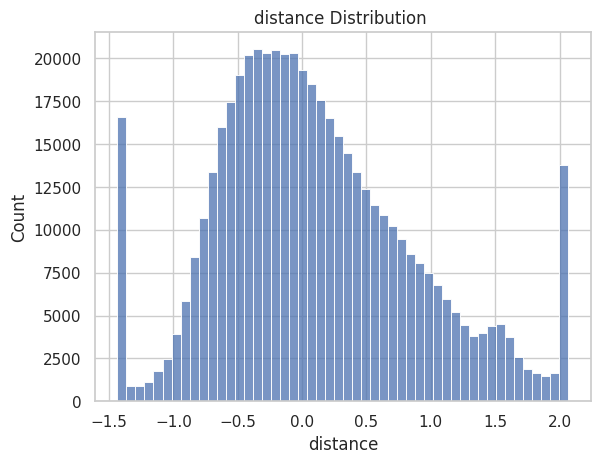

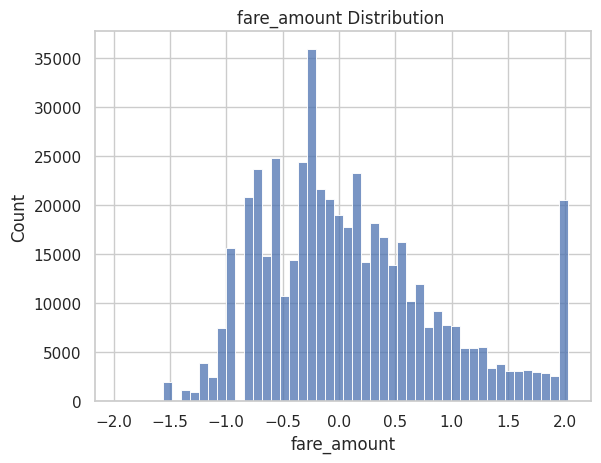

In [137]:
arr=['jfk_dist', 'ewr_dist', 'lga_dist', 'sol_dist',
       'nyc_dist', 'distance','fare_amount']
for i in arr :
    fig1 = sns.histplot(
    df_2,
    x=i,
    bins=50,
)
    fig1.set_title(f"{i} Distribution ")
    plt.show()


In [138]:
from sklearn.model_selection import train_test_split

# X = features, y = target
X = df_2.drop("fare_amount", axis=1)
y = df_2["fare_amount"]

X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [139]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Initialize and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on validation set
y_pred = model.predict(X_val)

# Evaluate the model
mae = mean_absolute_error(y_val, y_pred)
rmse = np.sqrt(mean_squared_error(y_val, y_pred))
r2 = r2_score(y_val, y_pred)

print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.2f}")


MAE: 0.28
RMSE: 0.45
R² Score: 0.67


In [140]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, r2_score

model = XGBRegressor(
    n_estimators=400,
    learning_rate=0.1,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    n_jobs=-1
)

model.fit(X_train, y_train,
          eval_set=[(X_val, y_val)],
          early_stopping_rounds=10,
          verbose=False)


# Predict
y_pred = model.predict(X_val)

# Evaluate
print("MAE:", mean_absolute_error(y_val, y_pred))
print("R²:", r2_score(y_val, y_pred))


/usr/local/lib/python3.11/dist-packages/xgboost/sklearn.py:889: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



MAE: 0.19560591374024286
R²: 0.8312243960566391


In [102]:
df_2.shape

(499974, 21)

In [126]:
df.shape

(499974, 21)

In [117]:
df.columns

Index(['Car Condition', 'Weather', 'Traffic Condition', 'fare_amount',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'passenger_count', 'hour', 'day', 'month',
       'weekday', 'year', 'jfk_dist', 'ewr_dist', 'lga_dist', 'sol_dist',
       'nyc_dist', 'distance', 'bearing'],
      dtype='object')

In [118]:
corr_matrix = df_2.corr()

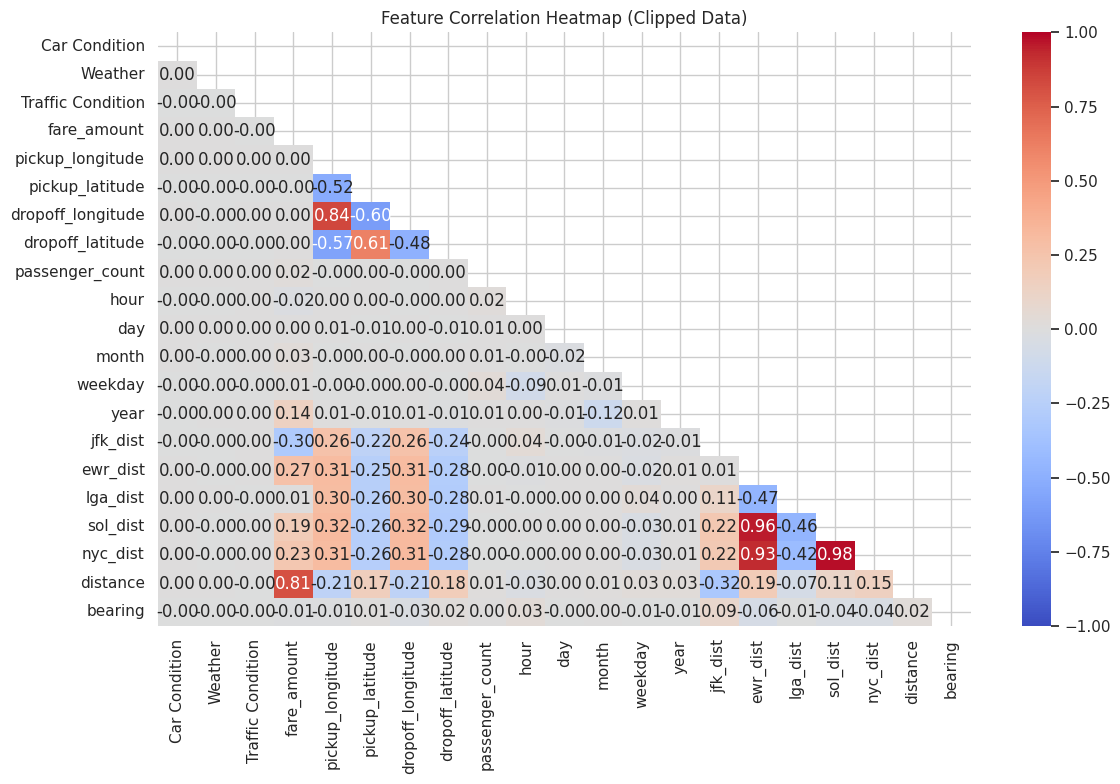

In [119]:
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, 
            annot=True, 
            fmt=".2f", 
            cmap='coolwarm',
            vmin=-1, vmax=1,
            mask=np.triu(np.ones_like(corr_matrix, dtype=bool)))
plt.title("Feature Correlation Heatmap (Clipped Data)")
plt.tight_layout()
plt.show()

In [143]:
df_3=df_2[["distance","nyc_dist","sol_dist","ewr_dist","jfk_dist","year","fare_amount"]]
df_3.head()

,distance,nyc_dist,sol_dist,ewr_dist,jfk_dist,year,fare_amount
297860,0.247578,0.216163,0.273922,0.428580,-0.634922,2009,0.453963
124750,1.057329,-0.684104,-1.327587,-0.904199,-0.802601,2009,0.930159
82469,-0.759407,-0.272085,-0.258219,-0.340950,0.327203,2009,-0.422076
124445,-0.398175,-0.332419,-0.259931,-0.185424,-0.408058,2009,-0.601410
76195,-0.517766,-0.314997,-0.392634,0.188268,-1.990417,2009,-0.725265


In [141]:
df_2.columns


Index(['Car Condition', 'Weather', 'Traffic Condition', 'fare_amount',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'passenger_count', 'hour', 'day', 'month',
       'weekday', 'year', 'jfk_dist', 'ewr_dist', 'lga_dist', 'sol_dist',
       'nyc_dist', 'distance', 'bearing'],
      dtype='object')

In [144]:
from sklearn.model_selection import train_test_split

# X = features, y = target
X = df_3.drop("fare_amount", axis=1)
y = df_3["fare_amount"]

X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42
)



In [145]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Initialize and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on validation set
y_pred = model.predict(X_val)

# Evaluate the model
mae = mean_absolute_error(y_val, y_pred)
rmse = np.sqrt(mean_squared_error(y_val, y_pred))
r2 = r2_score(y_val, y_pred)

print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.2f}")

MAE: 0.30
RMSE: 0.44
R² Score: 0.68


In [146]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, r2_score

model = XGBRegressor(
    n_estimators=400,
    learning_rate=0.1,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    n_jobs=-1
)

model.fit(X_train, y_train,
          eval_set=[(X_val, y_val)],
          early_stopping_rounds=10,
          verbose=False)


# Predict
y_pred = model.predict(X_val)

# Evaluate
print("MAE:", mean_absolute_error(y_val, y_pred))
print("R²:", r2_score(y_val, y_pred))


/usr/local/lib/python3.11/dist-packages/xgboost/sklearn.py:889: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



MAE: 0.2354075292536281
R²: 0.7937328605013121
